In [2]:
# import the necessary libraries
import numpy as np
import pandas as pd

# for visuals
import seaborn as sns
import matplotlib.pyplot as plt
import squarify

In [3]:
uc = pd.read_csv(r'Unicorn_Companies.csv')
uc

,Company,Valuation,Date Joined,Industry,City,Country,Continent,Year Founded,Funding,Select Investors
0,Bytedance,$180B,2017-04-07,Artificial intelligence,Beijing,China,Asia,2012,$8B,"Sequoia Capital China, SIG Asia Investments, S..."
1,SpaceX,$100B,2012-12-01,Other,Hawthorne,United States,North America,2002,$7B,"Founders Fund, Draper Fisher Jurvetson, Rothen..."
2,SHEIN,$100B,2018-07-03,E-commerce & direct-to-consumer,Shenzhen,China,Asia,2008,$2B,"Tiger Global Management, Sequoia Capital China..."
3,Stripe,$95B,2014-01-23,Fintech,San Francisco,United States,North America,2010,$2B,"Khosla Ventures, LowercaseCapital, capitalG"
4,Klarna,$46B,2011-12-12,Fintech,Stockholm,Sweden,Europe,2005,$4B,"Institutional Venture Partners, Sequoia Capita..."
...,...,...,...,...,...,...,...,...,...,...
1069,Zhaogang,$1B,2017-06-29,E-commerce & direct-to-consumer,Shanghai,China,Asia,2012,$379M,"K2 Ventures, Matrix Partners China, IDG Capital"
1070,Zhuan Zhuan,$1B,2017-04-18,E-commerce & direct-to-consumer,Beijing,China,Asia,2015,$990M,"58.com, Tencent Holdings"
1071,Zihaiguo,$1B,2021-05-06,Consumer & retail,Chongqing,China,Asia,2018,$80M,"Xingwang Investment Management, China Capital ..."
1072,Zopa,$1B,2021-10-19,Fintech,London,United Kingdom,Europe,2005,$792M,"IAG Capital Partners, Augmentum Fintech, North..."


# Data Inspection and Manipulation

In [4]:
uc.rename(columns = {'Select Investors':'Select_Investors'}, inplace = True)

In [5]:
# view the shape of the data
uc.shape

(1074, 10)

In [6]:
# view info about the data
uc.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1074 entries, 0 to 1073
Data columns (total 10 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   Company           1074 non-null   object
 1   Valuation         1074 non-null   object
 2   Date Joined       1074 non-null   object
 3   Industry          1074 non-null   object
 4   City              1058 non-null   object
 5   Country           1074 non-null   object
 6   Continent         1074 non-null   object
 7   Year Founded      1074 non-null   int64 
 8   Funding           1074 non-null   object
 9   Select_Investors  1073 non-null   object
dtypes: int64(1), object(9)
memory usage: 84.0+ KB


In [7]:
uc.columns

Index(['Company', 'Valuation', 'Date Joined', 'Industry', 'City', 'Country',
       'Continent', 'Year Founded', 'Funding', 'Select_Investors'],
      dtype='object')

In [8]:
# view the summary statistics of the dataset
uc.describe()

,Year Founded
count,1074.000000
mean,2012.895717
std,5.698573
min,1919.000000
25%,2011.000000
50%,2014.000000
75%,2016.000000
max,2021.000000


In [9]:
# checking for missing values
uc.isnull().sum()

Company              0
Valuation            0
Date Joined          0
Industry             0
City                16
Country              0
Continent            0
Year Founded         0
Funding              0
Select_Investors     1
dtype: int64

In [10]:
uc[uc.City.isnull()]

,Company,Valuation,Date Joined,Industry,City,Country,Continent,Year Founded,Funding,Select_Investors
12,FTX,$32B,2021-07-20,Fintech,NaN,Bahamas,North America,2018,$2B,"Sequoia Capital, Thoma Bravo, Softbank"
170,HyalRoute,$4B,2020-05-26,Mobile & telecommunications,NaN,Singapore,Asia,2015,$263M,Kuang-Chi
242,Moglix,$3B,2021-05-17,E-commerce & direct-to-consumer,NaN,Singapore,Asia,2015,$471M,"Jungle Ventures, Accel, Venture Highway"
251,Trax,$3B,2019-07-22,Artificial intelligence,NaN,Singapore,Asia,2010,$1B,"Hopu Investment Management, Boyu Capital, DC T..."
325,Amber Group,$3B,2021-06-21,Fintech,NaN,Hong Kong,Asia,2015,$328M,"Tiger Global Management, Tiger Brokers, DCM Ve..."
382,Ninja Van,$2B,2021-09-27,"Supply chain, logistics, & delivery",NaN,Singapore,Asia,2014,$975M,"B Capital Group, Monk's Hill Ventures, Dynamic..."
541,Advance Intelligence Group,$2B,2021-09-23,Artificial intelligence,NaN,Singapore,Asia,2016,$536M,"Vision Plus Capital, GSR Ventures, ZhenFund"
811,Carousell,$1B,2021-09-15,E-commerce & direct-to-consumer,NaN,Singapore,Asia,2012,$288M,"500 Global, Rakuten Ventures, Golden Gate Vent..."
848,Matrixport,$1B,2021-06-01,Fintech,NaN,Singapore,Asia,2019,$100M,"Dragonfly Captial, Qiming Venture Partners, DS..."
880,bolttech,$1B,2021-07-01,Fintech,NaN,Singapore,Asia,2018,$210M,"Mundi Ventures, Doqling Capital Partners, Acti..."


In [11]:
# How many uniqe Company dont have no City
len(uc[uc.City.isnull()].Company.unique())

16

In [12]:
# What Companies have with no Cities and how many records are affected?
uc[uc.City.isnull()].Company.value_counts()

FTX                           1
HyalRoute                     1
Moglix                        1
Trax                          1
Amber Group                   1
Ninja Van                     1
Advance Intelligence Group    1
Carousell                     1
Matrixport                    1
bolttech                      1
Carro                         1
Cider                         1
NIUM                          1
ONE                           1
PatSnap                       1
WeLab                         1
Name: Company, dtype: int64

In [13]:
# Checking the number of records that will be affected

print('Total number of records: ', uc.shape[0])
print('Number of records with missing City: ', uc[uc.City.isnull()].shape[0])
print('Number of records without missing City: ', uc[uc.City.notna()].shape[0])

Total number of records:  1074
Number of records with missing City:  16
Number of records without missing City:  1058


In [14]:
# Number of rows with descriptions
num_missing = uc[uc.City.isnull()].shape[0]

# number of rows in all the dataset
num_all = uc.shape[0]

# percentage of rows with missing description
round((num_missing / num_all) * 100, 2)

1.49

In [15]:
# Records that are not NaN: notna()
uc = uc[uc.City.notna()]
uc

,Company,Valuation,Date Joined,Industry,City,Country,Continent,Year Founded,Funding,Select_Investors
0,Bytedance,$180B,2017-04-07,Artificial intelligence,Beijing,China,Asia,2012,$8B,"Sequoia Capital China, SIG Asia Investments, S..."
1,SpaceX,$100B,2012-12-01,Other,Hawthorne,United States,North America,2002,$7B,"Founders Fund, Draper Fisher Jurvetson, Rothen..."
2,SHEIN,$100B,2018-07-03,E-commerce & direct-to-consumer,Shenzhen,China,Asia,2008,$2B,"Tiger Global Management, Sequoia Capital China..."
3,Stripe,$95B,2014-01-23,Fintech,San Francisco,United States,North America,2010,$2B,"Khosla Ventures, LowercaseCapital, capitalG"
4,Klarna,$46B,2011-12-12,Fintech,Stockholm,Sweden,Europe,2005,$4B,"Institutional Venture Partners, Sequoia Capita..."
...,...,...,...,...,...,...,...,...,...,...
1069,Zhaogang,$1B,2017-06-29,E-commerce & direct-to-consumer,Shanghai,China,Asia,2012,$379M,"K2 Ventures, Matrix Partners China, IDG Capital"
1070,Zhuan Zhuan,$1B,2017-04-18,E-commerce & direct-to-consumer,Beijing,China,Asia,2015,$990M,"58.com, Tencent Holdings"
1071,Zihaiguo,$1B,2021-05-06,Consumer & retail,Chongqing,China,Asia,2018,$80M,"Xingwang Investment Management, China Capital ..."
1072,Zopa,$1B,2021-10-19,Fintech,London,United Kingdom,Europe,2005,$792M,"IAG Capital Partners, Augmentum Fintech, North..."


In [16]:
# What are the rows with NaN values
uc.isnull().sum()

Company             0
Valuation           0
Date Joined         0
Industry            0
City                0
Country             0
Continent           0
Year Founded        0
Funding             0
Select_Investors    1
dtype: int64

In [17]:
uc.dtypes

Company             object
Valuation           object
Date Joined         object
Industry            object
City                object
Country             object
Continent           object
Year Founded         int64
Funding             object
Select_Investors    object
dtype: object

In [18]:
uc[uc.Select_Investors.isnull()]

,Company,Valuation,Date Joined,Industry,City,Country,Continent,Year Founded,Funding,Select_Investors
629,LinkSure Network,$1B,2015-01-01,Mobile & telecommunications,Shanghai,China,Asia,2013,$52M,NaN


In [19]:
len(uc[uc.Select_Investors.isnull()].Company.unique())

1

In [20]:
uc[uc.Select_Investors.isnull()].Company.value_counts()

LinkSure Network    1
Name: Company, dtype: int64

In [21]:
print('Total number of records: ', uc.shape[0])
print('Number of records with missing City: ', uc[uc.Select_Investors.isnull()].shape[0])
print('Number of records without missing City: ', uc[uc.Select_Investors.notna()].shape[0])

Total number of records:  1058
Number of records with missing City:  1
Number of records without missing City:  1057


In [22]:
num_missing = uc[uc.Select_Investors.isnull()].shape[0]
num_all = uc.shape[0]
round((num_missing / num_all) * 100, 2)

0.09

In [23]:
uc = uc[uc.Select_Investors.notna()]
uc

,Company,Valuation,Date Joined,Industry,City,Country,Continent,Year Founded,Funding,Select_Investors
0,Bytedance,$180B,2017-04-07,Artificial intelligence,Beijing,China,Asia,2012,$8B,"Sequoia Capital China, SIG Asia Investments, S..."
1,SpaceX,$100B,2012-12-01,Other,Hawthorne,United States,North America,2002,$7B,"Founders Fund, Draper Fisher Jurvetson, Rothen..."
2,SHEIN,$100B,2018-07-03,E-commerce & direct-to-consumer,Shenzhen,China,Asia,2008,$2B,"Tiger Global Management, Sequoia Capital China..."
3,Stripe,$95B,2014-01-23,Fintech,San Francisco,United States,North America,2010,$2B,"Khosla Ventures, LowercaseCapital, capitalG"
4,Klarna,$46B,2011-12-12,Fintech,Stockholm,Sweden,Europe,2005,$4B,"Institutional Venture Partners, Sequoia Capita..."
...,...,...,...,...,...,...,...,...,...,...
1069,Zhaogang,$1B,2017-06-29,E-commerce & direct-to-consumer,Shanghai,China,Asia,2012,$379M,"K2 Ventures, Matrix Partners China, IDG Capital"
1070,Zhuan Zhuan,$1B,2017-04-18,E-commerce & direct-to-consumer,Beijing,China,Asia,2015,$990M,"58.com, Tencent Holdings"
1071,Zihaiguo,$1B,2021-05-06,Consumer & retail,Chongqing,China,Asia,2018,$80M,"Xingwang Investment Management, China Capital ..."
1072,Zopa,$1B,2021-10-19,Fintech,London,United Kingdom,Europe,2005,$792M,"IAG Capital Partners, Augmentum Fintech, North..."


In [24]:
uc.columns

Index(['Company', 'Valuation', 'Date Joined', 'Industry', 'City', 'Country',
       'Continent', 'Year Founded', 'Funding', 'Select_Investors'],
      dtype='object')

In [25]:
uc.isnull().sum()

Company             0
Valuation           0
Date Joined         0
Industry            0
City                0
Country             0
Continent           0
Year Founded        0
Funding             0
Select_Investors    0
dtype: int64

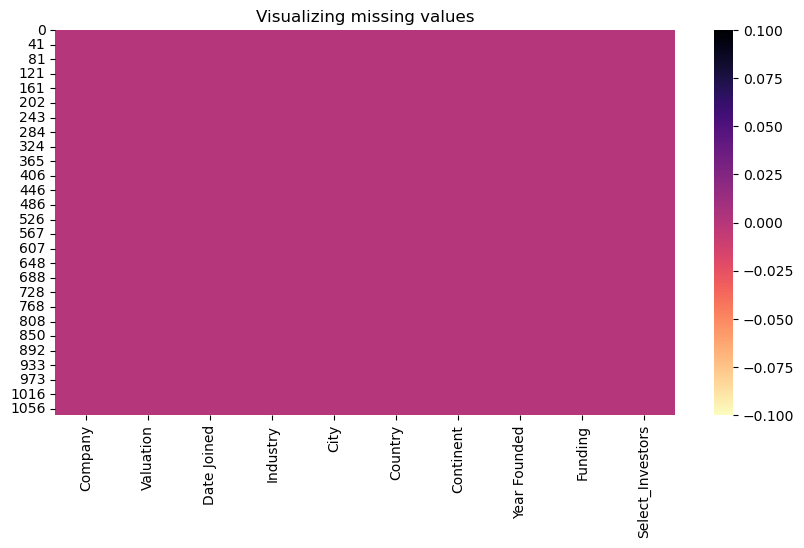

In [26]:
# Visualizing missing values 
plt.figure(figsize = (10, 5))
plt.title('Visualizing missing values')
sns.heatmap(uc.isnull(), cbar = True, cmap = 'magma_r')
plt.show()

In [27]:
# Total types of industires

Tyes_Indus = uc['Industry'].value_counts().sort_values()
Tyes_Indus

Artificial Intelligence                 11
Travel                                  14
Consumer & retail                       25
Edtech                                  28
Auto & transportation                   31
Hardware                                34
Mobile & telecommunications             36
Data management & analytics             41
Cybersecurity                           50
Supply chain, logistics, & delivery     56
Other                                   58
Artificial intelligence                 71
Health                                  74
E-commerce & direct-to-consumer        107
Internet software & services           203
Fintech                                218
Name: Industry, dtype: int64

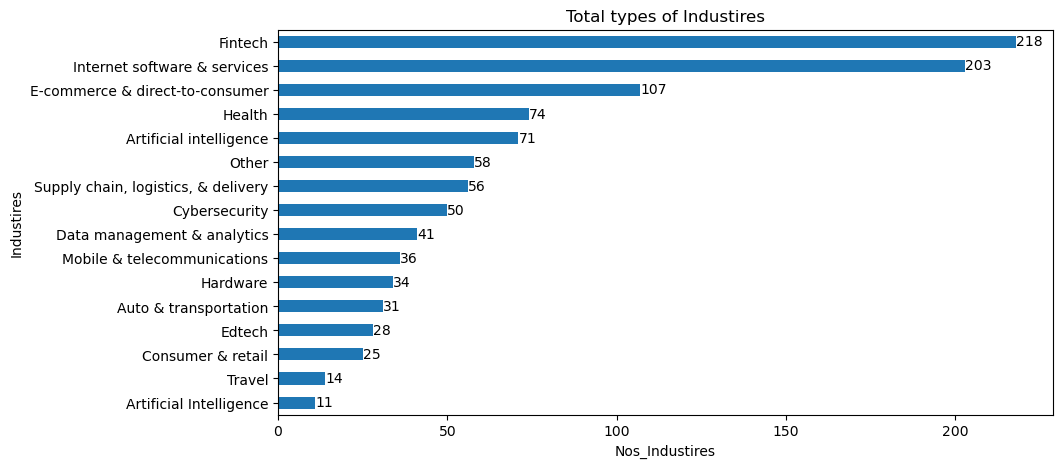

In [28]:
Tyes_Indus = Tyes_Indus.plot(kind = 'barh', figsize = (10, 5), title = 'Total types of Industires', xlabel = 'Nos_Industires', 
                       ylabel = 'Industires', legend = False)
Tyes_Indus.bar_label(Tyes_Indus.containers[0], label_type = 'edge')
Tyes_Indus.margins(y = 0.1)
plt.show()

# Observation.

- Fron the graph above, Fintech has the highest count of companies in the industry with 218 companies   and  artificial intelligence with least count of companies in the industry with 11 companies in the industry


In [29]:
# Top 5 Countries for investors funding

Top5_Contries = uc['Country'].value_counts().sort_values().tail(5)
Top5_Contries

Germany            26
United Kingdom     43
India              65
China             172
United States     562
Name: Country, dtype: int64

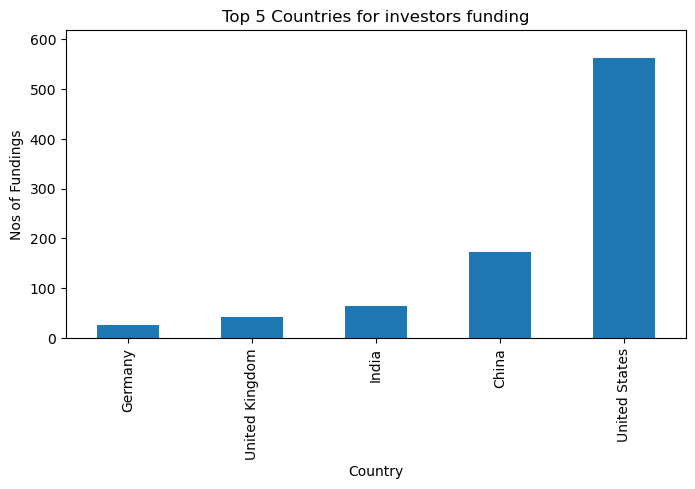

In [30]:
Top5_Contries = Top5_Contries.plot(kind = 'bar', figsize = (8, 4), title = 'Top 5 Countries for investors funding', xlabel = 'Country', 
                       ylabel = 'Nos of Fundings', legend = False)
Top5_Contries.bar_label(Tyes_Indus.containers[0], label_type = 'edge')
Top5_Contries.margins(y = 0.1)
plt.show()

# Observation.
USA has the highest count of funding with a total of 562 investors funding, followed by China with 172 count of investors funding.

In [31]:
uc.dtypes

Company             object
Valuation           object
Date Joined         object
Industry            object
City                object
Country             object
Continent           object
Year Founded         int64
Funding             object
Select_Investors    object
dtype: object

In [32]:
uc.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1057 entries, 0 to 1073
Data columns (total 10 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   Company           1057 non-null   object
 1   Valuation         1057 non-null   object
 2   Date Joined       1057 non-null   object
 3   Industry          1057 non-null   object
 4   City              1057 non-null   object
 5   Country           1057 non-null   object
 6   Continent         1057 non-null   object
 7   Year Founded      1057 non-null   int64 
 8   Funding           1057 non-null   object
 9   Select_Investors  1057 non-null   object
dtypes: int64(1), object(9)
memory usage: 90.8+ KB


In [42]:
uc['Funding'] = uc['Funding'].astype(int)


ValueError: invalid literal for int() with base 10: '$8B'

In [35]:
uc.dtypes

Company             object
Valuation           object
Date Joined         object
Industry            object
City                object
Country             object
Continent           object
Year Founded         int64
Funding             object
Select_Investors    object
dtype: object

In [36]:
uc.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1057 entries, 0 to 1073
Data columns (total 10 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   Company           1057 non-null   object
 1   Valuation         1057 non-null   object
 2   Date Joined       1057 non-null   object
 3   Industry          1057 non-null   object
 4   City              1057 non-null   object
 5   Country           1057 non-null   object
 6   Continent         1057 non-null   object
 7   Year Founded      1057 non-null   int64 
 8   Funding           1057 non-null   object
 9   Select_Investors  1057 non-null   object
dtypes: int64(1), object(9)
memory usage: 90.8+ KB


In [37]:
# Bottom 4 countries with minimun funding by investors
Country_Funding = uc['Funding'].groupby(uc.Country).min().sort_values().tail(4)
Country_Funding

Country
South Africa    $547M
Lithuania       $562M
Nigeria         $570M
Malaysia        $577M
Name: Funding, dtype: object

ValueError: could not convert string to float: '$547M'

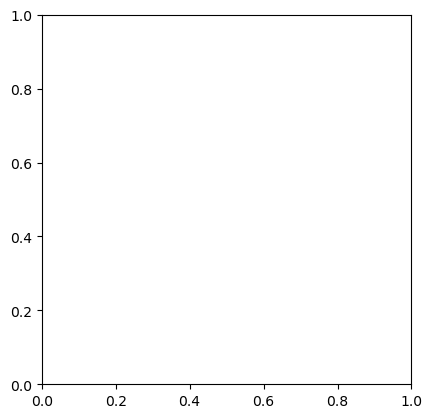

In [40]:
# Visualize using pie chat the top 3 price
explode = (0.1, 0, 0)
plt.pie(Country_Funding, labels = Country_Funding.index, autopct = '%2.2f%%', shadow = True, startangle = 130)
plt.title('Top 3 location by price')
plt.show()

In [39]:
# Which country has the minimun funding 
Country_Valuation = uc['Valuation'].groupby(uc.Country).max().sort_values().tail(4)
Country_Valuation

Country
United States    $9B
South Korea      $9B
Mexico           $9B
Germany          $9B
Name: Valuation, dtype: object